In [1]:
from data_loader import get_mnist_loaders
from training import greedy_layerwise_pretraining, supervised_training, train_baseline_model
from time import time
from visualization import (visualize_weights, plot_model_performance, plot_loss_curves, plot_accuracy_curves, plot_confusion_matrices, 
plot_training_time, visualize_weights_evolution, plot_weight_differences)

#def main():
# Load data
print("Step 1: Data loading")
start_time = time()
train_loader, test_loader = get_mnist_loaders()
step_1_time = time()
print("End Step 1: Data loading time = {:.2f} seconds".format(step_1_time - start_time))

# Train baseline model
print("Step 2: Baseline training")
baseline_accuracy, baseline_losses, baseline_times, baseline_weights, baseline_preds, true_labels = train_baseline_model(train_loader, test_loader)
step_2_time = time()
print("End Step 2: Baseline training time = {:.2f} seconds".format(step_2_time - step_1_time))

# Greedy layer-wise unsupervised pretraining
print("Step 3: Unsupervised pretraining")
pretrained_model, pretrained_losses, pretrained_times, pretrained_weights, pretrained_preds = greedy_layerwise_pretraining(train_loader,test_loader)
step_3_time = time()
print("End Step 3: Unsupervised pretraining time = {:.2f} seconds".format(step_3_time - step_2_time))

# Supervised fine-tuning
print("Step 4: Supervised fine-tuning")
final_model, final_accuracy, final_losses, final_times, final_weights, final_preds, _ = \
supervised_training(pretrained_model, train_loader, test_loader)
step_4_time = time()
print("End Step 4: Supervised fine-tuning time = {:.2f} seconds".format(step_4_time - step_3_time))

#if __name__ == "__main__":
#    main()


Step 1: Data loading
End Step 1: Data loading time = 0.03 seconds
Step 2: Baseline training
 Baseline training: Epoch 1/5


 Training epoch 1/5: 100%|██████████| 938/938 [00:12<00:00, 77.25it/s]


 Baseline training: Epoch 2/5


 Training epoch 2/5: 100%|██████████| 938/938 [00:13<00:00, 72.06it/s]


 Baseline training: Epoch 3/5


 Training epoch 3/5: 100%|██████████| 938/938 [00:12<00:00, 75.85it/s]


 Baseline training: Epoch 4/5


 Training epoch 4/5: 100%|██████████| 938/938 [00:12<00:00, 72.70it/s]


 Baseline training: Epoch 5/5


 Training epoch 5/5: 100%|██████████| 938/938 [00:13<00:00, 71.57it/s]


 Evaluating the model on the test set...


 Evaluating: 100%|██████████| 10/10 [00:01<00:00,  5.29it/s]


 Baseline model accuracy: 9784/10000 (97.84%)
End Step 2: Baseline training time = 65.45 seconds
Step 3: Unsupervised pretraining
 Training Autoencoder 1 (28*28 -> 128)


  Autoencoder 1 training: Epoch 5/5, Loss: 0.1558: 100%|██████████| 938/938 [00:15<00:00, 59.83it/s]


 Training Autoencoder 2 (128 -> 64)


  Autoencoder 2 training: Epoch 5/5, Loss: 0.2709: 100%|██████████| 157/157 [00:00<00:00, 365.69it/s]


End Step 3: Unsupervised pretraining time = 83.94 seconds
Step 4: Supervised fine-tuning


 Evaluating: 9742/10000 correct: 100%|██████████| 10/10 [00:02<00:00,  4.94it/s]

 Test set: Accuracy: 9742/10000 (97.42%)
End Step 4: Supervised fine-tuning time = 80.41 seconds


In [2]:
print(final_model)

SimpleNN(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)


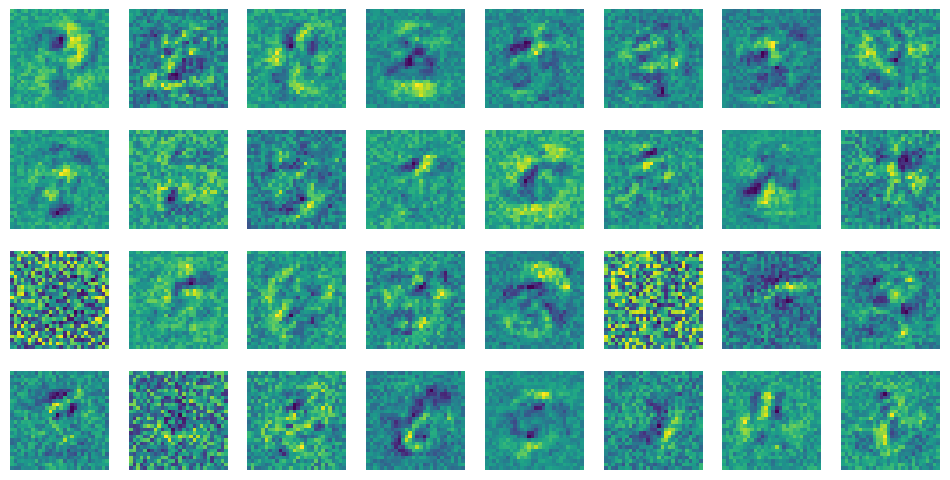

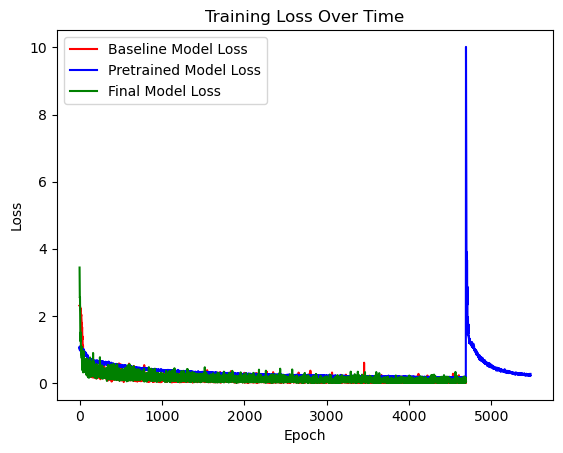

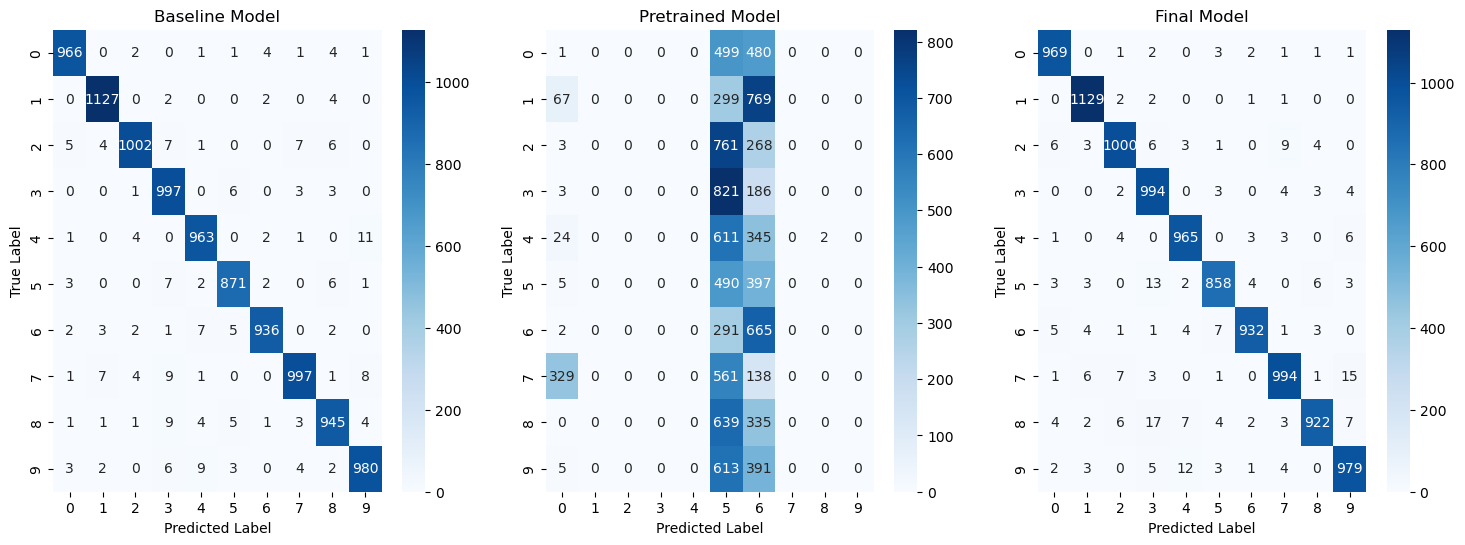

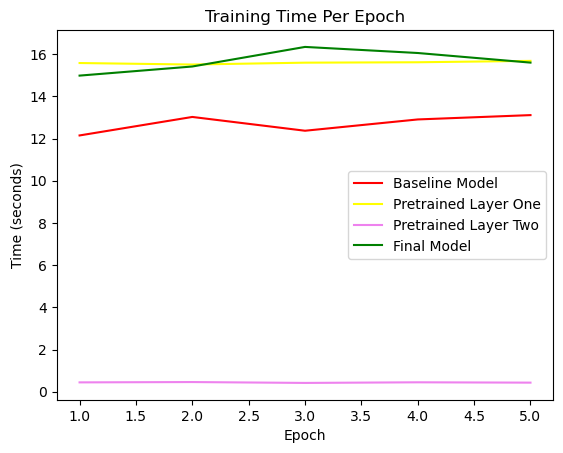

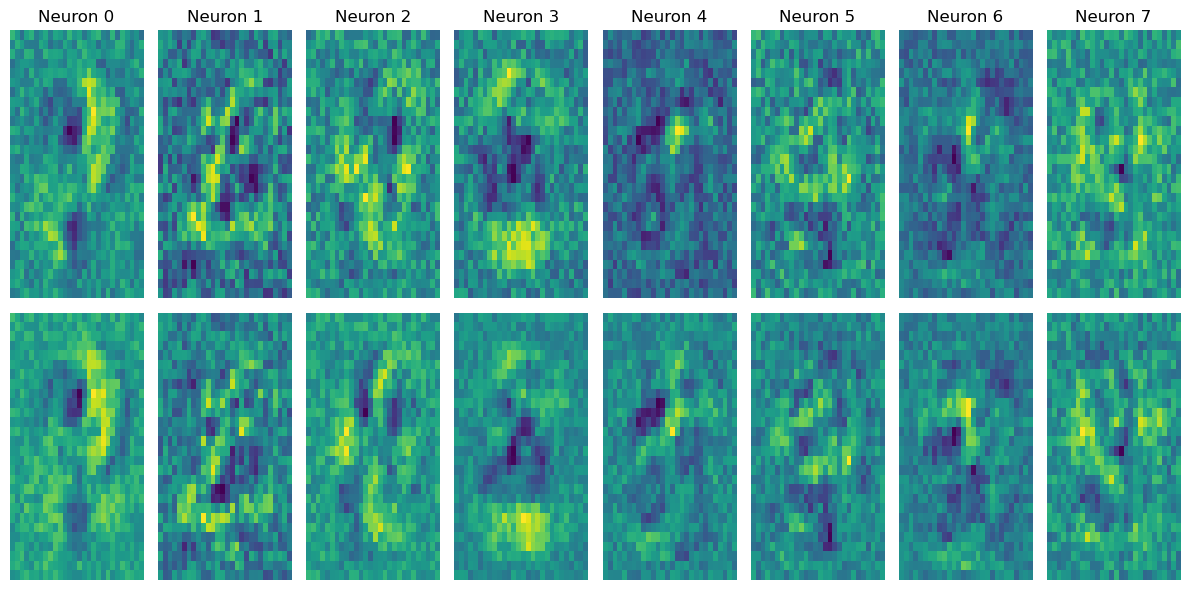

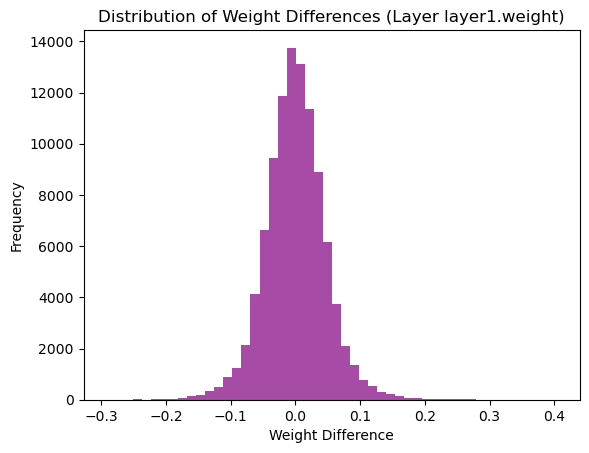

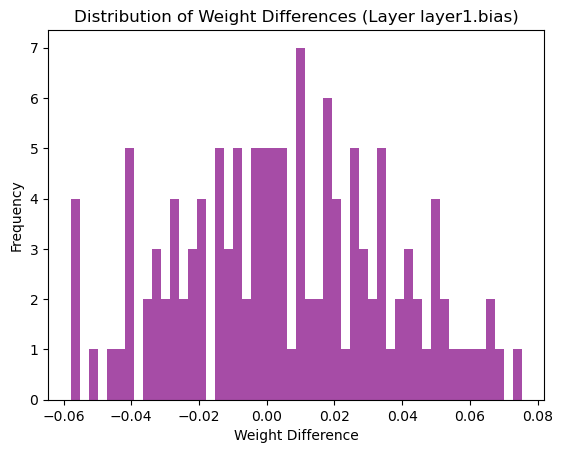

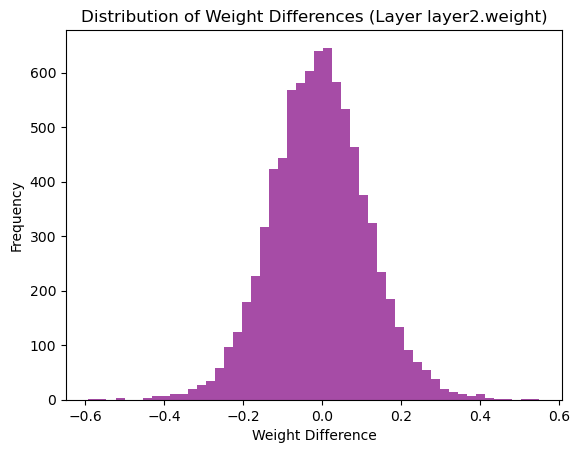

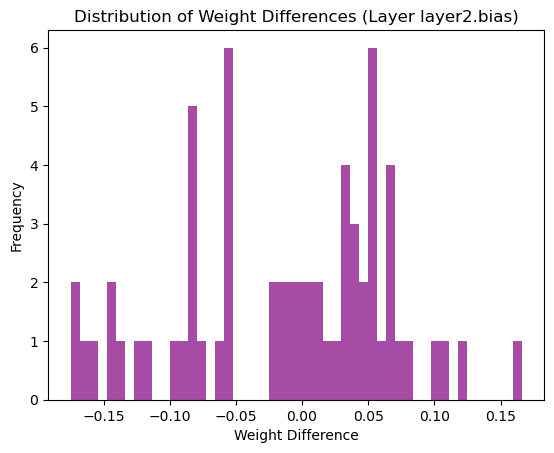

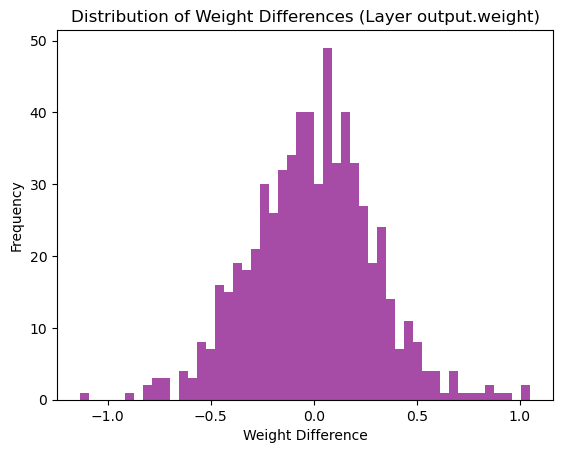

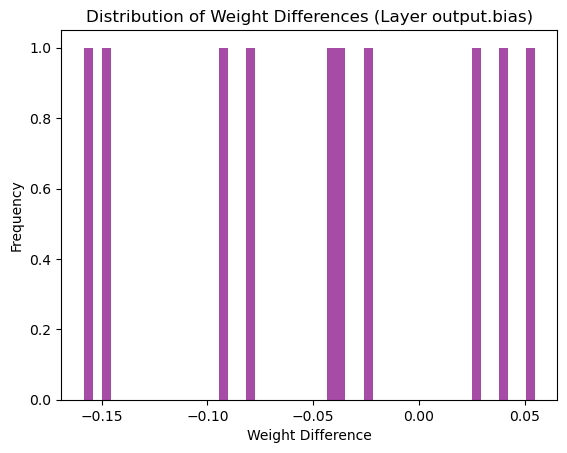

Total execution time = 229.83 seconds


In [3]:
# Visualize the results
visualize_weights(final_model, layer_index=1)
#plot_model_performance(final_accuracy, baseline_accuracy)
plot_loss_curves(baseline_losses, pretrained_losses, final_losses)
#plot_accuracy_curves([baseline_accuracy], [final_accuracy], [final_accuracy])
plot_confusion_matrices(true_labels, baseline_preds, pretrained_preds, final_preds)
plot_training_time(baseline_times, pretrained_times, final_times)
visualize_weights_evolution(final_weights, epochs=[0, len(final_weights) - 1], layer_index='layer1.weight')
plot_weight_differences(baseline_weights[-1], final_weights[-1])  # Assuming you want the final epoch weights for comparison

# Total time
print("Total execution time = {:.2f} seconds".format(step_4_time - start_time))